<a href="https://colab.research.google.com/github/laurenskie/Predictive_analytics_Sp24/blob/main/Rivera_L_Final_Predictive_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Directions: Given the dataset, complete a Sentiment Analysis.  The Analysis should contain:**
  - EDA Visualizations
  - Use of the NLTK Library
  - Comparison of 2 - 4 ML models

You may choose to use ML models or create you own Neural Network.  You are NOT required to do both; choose one and stick to it!!


Data link:

encoding = "ISO-8859-1"
dataset = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/NLP%20Projects/Apple-Twitter-Sentiment/Apple-Twitter-Sentiment-DFE.csv&#39;, encoding = e

**Goal**:  The goal os this sentiment analysis is to analyze tweets about Apple and classify their sentiment as positive, negative or nuetral

**Import necessary libararies**

In [ ]:
import itertools
import pandas as pd
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn
import csv
import re
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords,wordnet
from nltk import NaiveBayesClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
from keras.models import load_model

# tokenize the dataset corpus, delete uncommon words such as names.
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from IPython.display import display, HTML
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import precision_score, accuracy_score, f1_score,recall_score, roc_auc_score,precision_recall_curve, average_precision_score, auc, roc_curve
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.metrics import classification_report, accuracy_score

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')
# from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pickle

sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset:  It is from Twitter or X and contains tweets related to APple.

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/glopez21/ML-Data/main/NLP%20Projects/Apple-Twitter-Sentiment/Apple-Twitter-Sentiment-DFE.csv'
data = pd.read_csv(url, encoding='ISO-8859-1')

# EDA

In [ ]:
# Display the first few rows and inspect columns
data.head(30)



/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
5,623495518,True,golden,13,NaN,3,0.5975,Mon Dec 01 20:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,623495519,True,golden,13,NaN,5,0.8468,Mon Dec 01 20:32:45 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,Top 3 all @Apple #tablets. Damn right! http://...
7,623495520,True,golden,9,NaN,5,0.6736,Mon Dec 01 20:34:31 +0000 2014,5.400000e+17,#AAPL OR @Apple,5\n3,CNBCTV: #Apple's margins better than expected?...
8,623495521,True,golden,15,NaN,3,0.7997,Mon Dec 01 20:36:47 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,Apple Inc. Flash Crash: What You Need to Know ...
9,623495522,False,finalized,3,12/12/14 0:52,3,0.6360,Mon Dec 01 20:45:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,#AAPL:This Presentation Shows What Makes The W...


In [ ]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')

In [ ]:
#Describe Data
data.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


In [ ]:
data['_trusted_judgments'].value_counts()

_trusted_judgments
3     3063
6      362
4      309
5       29
13      17
12      15
14      14
7       11
8       10
16       9
17       9
15       9
10       6
11       6
9        6
19       5
18       3
22       2
27       1
Name: count, dtype: int64

In [ ]:
# How many judgements we have
print('There are', data.shape[0], '_trusted_judgments')

# check for duplicates
print("There are", len(data[data.duplicated()]), "duplicates")

# check if we have missing values
print("There are", data.isnull().sum().sum(), "missing values")

There are 3886 _trusted_judgments
There are 0 duplicates
There are 3886 missing values


In [ ]:
# Check distribution of sentiment classes
print(data['sentiment'].value_counts())



sentiment
3               2162
1               1219
5                423
not_relevant      82
Name: count, dtype: int64


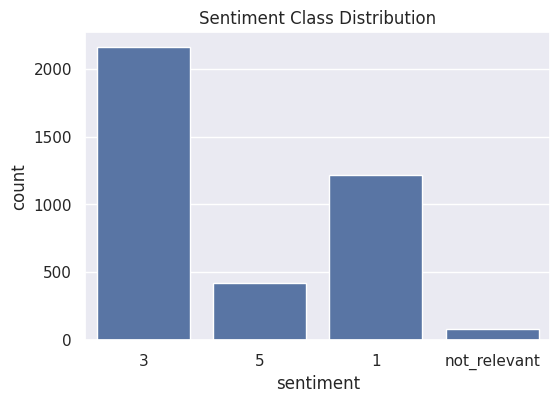

In [ ]:
# Visualize distribution of sentiment classes


plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Class Distribution')
plt.show()

# **Clean Data**
after inspecting the data, I decided to focus on 2 main columns; text (tweet) and sentiment (positive, negative, neutral).

I decided to drop all unecessary columns.  I then converted text to lowercase, removed special characters, numbers and extra spaces.  I tokenized text into words.  Tokenization is the process of breaking down words into tokens. These are then used to process stop words ike "to", "is", "the", "and", "it", "be" found in the tweets and to vectorize or stem. Stemming is to reduce words to the root so to reduce the number of unique words.  

In [ ]:
#Drop the unecessary columns
columns_to_drop = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
                   '_last_judgment_at', 'sentiment:confidence', 'sentiment_gold',
                   'date', 'id', 'query']
dataset = data.drop(columns=columns_to_drop)


In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and perform stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)
    return processed_text

In [ ]:
# Apply preprocessing to the dataset
data['processed_text'] = data['text'].apply(preprocess_text)

# **TF-IDF Vectorization:**

In [ ]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)


# **Split, Train, Test**

In [ ]:
# Fit and transform the training data
X = tfidf_vectorizer.fit_transform(data['processed_text']).toarray()


In [ ]:
# Target variable
y = data['sentiment']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [ ]:
# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test, y_pred))

Training Decision Tree...
Decision Tree Accuracy: 0.6578044596912521
              precision    recall  f1-score   support

           1       0.69      0.51      0.59       373
           3       0.70      0.84      0.76       635
           5       0.37      0.31      0.34       139
not_relevant       0.00      0.00      0.00        19

    accuracy                           0.66      1166
   macro avg       0.44      0.42      0.42      1166
weighted avg       0.65      0.66      0.64      1166

Training Logistic Regression...
Logistic Regression Accuracy: 0.7307032590051458
              precision    recall  f1-score   support

           1       0.79      0.62      0.70       373
           3       0.71      0.93      0.80       635
           5       0.81      0.21      0.33       139
not_relevant       0.00      0.00      0.00        19

    accuracy                           0.73      1166
   macro avg       0.58      0.44      0.46      1166
weighted avg       0.73      0.73  

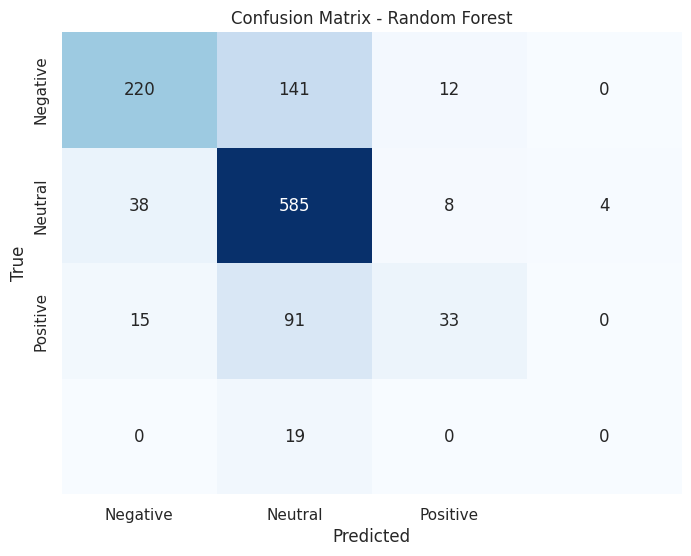

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6)) # Removed the extra indentation
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {name}')
plt.show()
